## Алгоритмы анализа данных

#### Урок 1. Алгоритм линейной регрессии. Градиентный спуск.

In [ ]:
#Задание 1. Проведите небольшое исследование алгоритма градиентного спуска. Оцените влияние значений скорости обучения (eta) и
#количества итераций на ошибку алгоритма. Как связаны эти два гиперпараметра между собой? Подберите скорость обучения и количество
#итераций до совпадения ответов алгоритма с результатами МНК. Как можно ускорить процесс вычисления весов?

In [1]:
#Импортируем основные библиотеки
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 14,
                     'xtick.labelsize': 14})

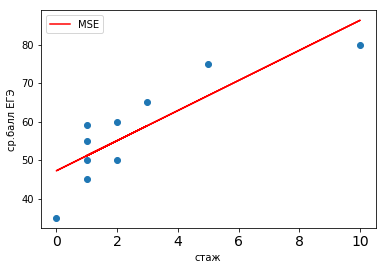

In [2]:
#Исследование будем проводить на "игрушечном" примере из урока 1.
#Дано:
#X - описание объектов (стаж репетиторов)
#Y - средний балл ЕГЭ (целевая переменная, то, что мы хотим научиться прогнозировать)
#w - веса/коэффициенты прямой, получаемые решая задачу регрессии методом наименьших квадратов

X = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],   # для умножения на intercept
              [1, 1, 2, 1, 3, 0, 5, 10, 1, 2]]).T

y = [45, 55, 50, 59, 65, 35, 75, 80, 50, 60]

w = np.linalg.inv(X.T @ X) @ X.T @ y

def calc_mse(y, y_pred):
    err = np.mean((y - y_pred)**2)
    return err

plt.scatter(X[:,1], y)
plt.xlabel('стаж')
plt.ylabel('ср.балл ЕГЭ')
plt.plot(X[:,1], np.dot(X, w), color = 'red', label = 'MSE')
plt.legend()

In [3]:
#Посчитаем mse для коэффициентов, полученных методов наименьших квадратов:
calc_mse(np.dot(X, w), y)

45.937499999999986

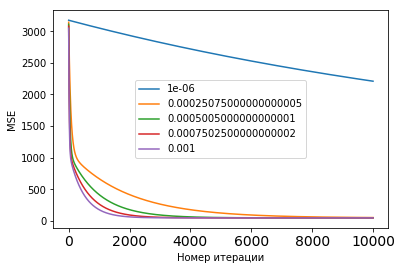

In [4]:
#Решим ту же самую задачу методом градиентного спуска, пытаясь подобрать оптимальное значение параметра eta - скорости обучения/
#шага:
#1. видим, что при слишком низкой скорости обучения не хватает даже 10000 итераций, чтобы приблизится к значению mse, рассчитан.
#для весов w, полученных методом наименьших квадратов;
#2. чем больше скорость обучения, тем быстрее мы достигаем целевого значения mse (45.937499999999986);
#3. при слишкой большой скорости обучения есть вероятность "перепрыгнуть" через минимум mse, так и не достигнув его;
#3. для шага 0.01 достаточно 696 итераций для достижения целевого значения mse c точностью до 3-го знака после запятой при
#   старте из точки w = np.array([1, 0.5]);
#4. необходимое количество итераций и шаг для достижения минимума mse зависит от выбранной точки для весов старта;

mse = {}
n = X.shape[0]
eta = np.linspace(0.000001, 0.001, 5)
iterations = 10000


for e in eta:
    mse[e] = []
    w = np.array([1, 0.5])
    for i in range(iterations): 
        grad = 1/n * 2 * np.dot(X.T, (np.dot(w, X.T) - y))
        w = w - e * grad
        y_pred = np.dot(X, w)
        mse[e].append(calc_mse(y, y_pred))
    plt.plot(mse[e], label = f'{e}')
    plt.xlabel('Номер итерации')
    plt.ylabel('MSE')
    plt.legend()

(0, 1000)

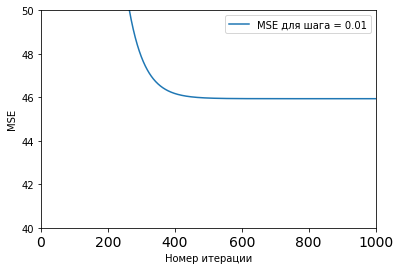

In [14]:
#для eta = 0.01
eta = 0.01
mse = []
w = np.array([1, 0.5])
for i in range(iterations): 
    grad = 1/n * 2 * np.dot(X.T, (np.dot(w, X.T) - y))
    w = w - eta * grad
    y_pred = np.dot(X, w)
    mse.append(calc_mse(y, y_pred))
plt.plot(mse, label = f'MSE для шага = {eta}')
plt.xlabel('Номер итерации')
plt.ylabel('MSE')
plt.legend()
plt.ylim([40,50])
plt.xlim([0,1000])

In [13]:
print(f'Необходимое количество итераций для достижения целевого значения mse c точностью до 3-го знака после запятой при старте из точки w = np.array([1, 0.5]):\n \n {mse.index(45.937991441005025)}')

Необходимое количество итераций для достижения целевого значения mse c точностью до 3-го знака после запятой при старте из точки w = np.array([1, 0.5]):
 
 696


In [26]:
#3. Вместо того, чтобы задавать количество итераций, задайте условие остановки алгоритма - когда ошибка за итерацию начинает
#изменяться ниже определенного порога. Сколько нужно сделать итераций, если установить допустимое отклонение mse в размере
#diff=1e-6, а значение eta=1e-2?

eta = 0.01
diff = 1e-6
mse = [0]
w = np.array([1, 0.5])
i = 0

grad = 1/n * 2 * np.dot(X.T, (np.dot(w, X.T) - y))
w = w - eta * grad
y_pred = np.dot(X, w)
mse.append(calc_mse(y, y_pred))

while abs(mse[i+1]-mse[i]) > diff:
    grad = 1/n * 2 * np.dot(X.T, (np.dot(w, X.T) - y))
    w = w - eta * grad
    y_pred = np.dot(X, w)
    mse.append(calc_mse(y, y_pred))
    i = i + 1
print(f'Количество итераций для установленного критерия остановки алгоритма при старте из точки w = np.array([1, 0.5]):\n \n {i}')

Количество итераций для установленного критерия остановки алгоритма при старте из точки w = np.array([1, 0.5]):
 
 808
